# Imports

In [1]:
from society import Society
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Society creativity distribution

### after time in different temperatures 

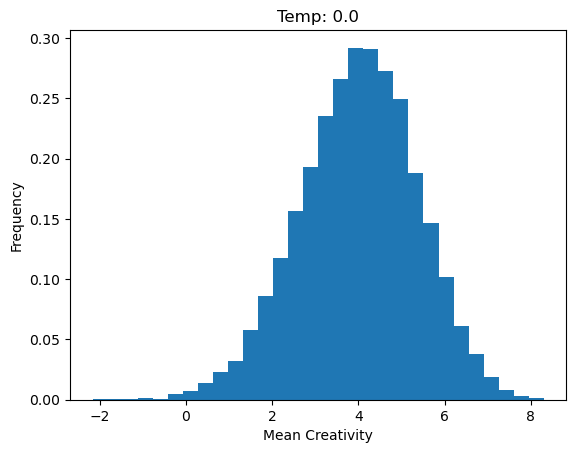

In [12]:
from society import Society
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.rcParams["hist.bins"] = 30
num_frames = 6
num_of_agents = 10000
time = num_of_agents * 10

T = np.linspace(0, 10, num_frames)
data = []
for temp in T:
    society = Society(temperature=temp, creativity_force=0.3, thresh=500, crea_mean=10, crea_stddev=0.2, num_of_agents=num_of_agents)
    society.run_until_time(time)
    dist = np.array([x.creativity for x in society.agents])
    data.append(dist)

fig, ax[0] = plt.subplots(facecolor='white')
# plt.hist(data[0][:], density=True)
# # ax.set_xlim((-2, 2))

def update(step):
    ax[0].clear()
    plt.hist(data[step][:], density=True)
    # ax.set_xlim((-5, 5))
    ax[0].set_title(f'Temp: {T[step]}')
    ax[0].set_xlabel('Mean Creativity')
    ax[0].set_ylabel('Frequency')

ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
HTML(ani.to_jshtml())


### evolution in time in given temperature

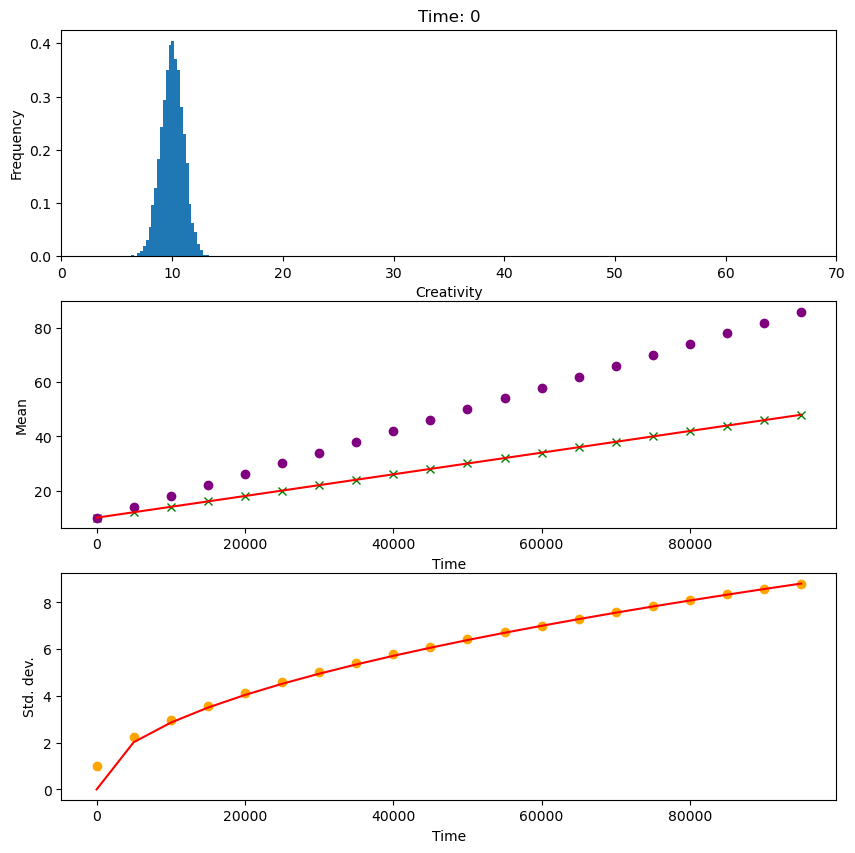

In [27]:
from society import Society
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.rcParams["hist.bins"] = 30
num_of_agents = 10000
time = num_of_agents * 10
num_frames = 20

data = []
means = []
means2 = []
stddevs = []
times = []
society = Society(temperature=0, creativity_force=2, thresh=0, crea_mean=10, crea_stddev=1, num_of_agents=num_of_agents)
society2 = Society(temperature=0, creativity_force=4, thresh=0, crea_mean=10, crea_stddev=1, num_of_agents=num_of_agents)
for t in range(time):
    society.next_step()
    society2.next_step()
    if t % (time // num_frames) == 0:
        times.append(t)
        dist = np.array([x.creativity for x in society.agents])
        data.append(dist)
        means.append(np.average(dist))
        means2.append(np.average([x.creativity for x in society2.agents]))
        stddevs.append(np.std(dist))
times_np = np.array(times)

fig, ax = plt.subplots(nrows=3, ncols=1,facecolor='white', figsize=(10,10))
ax[0].hist(data[0][:], density=True)
ax[0].set_xlim((0,70))

ax[1].plot(times, means, 'green', marker='x', linestyle='')
ax[1].plot(times, means2, 'purple', marker='o', linestyle='')
ax[1].plot(times_np, times_np*2*2/num_of_agents+10, 'red')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Mean')

ax[2].plot(times, stddevs, 'orange', marker='o', linestyle='')
ax[2].plot(times, np.sqrt(times)/35, 'red')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Std. dev.')

def update(step):
    ax[0].clear()
    ax[0].hist(data[step][:], density=True)
    ax[0].set_xlim((0,70))
    ax[0].set_title(f'Time: {times[step]}')
    ax[0].set_xlabel('Creativity')
    ax[0].set_ylabel('Frequency')

ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
HTML(ani.to_jshtml())
